The aim here is to group the customers based on three parameters: Monetary (amount of money spent), Frequency (how frequently the customer bought something) Recency (how many days has passed from today to their last purchase). I use k-means clustering for this purpose.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



In [2]:
df = pd.read_csv('Sample-Superstore.csv', sep=',', encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('-','_')


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

convert order dates from object to date

In [7]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])


Create three parameters of Monetary, Frequency and Recency.

In [8]:
df_Monetary=df.groupby('Customer_ID')['Sales'].mean() 
df_Manetary=df_Monetary.reset_index()
df_Frequency=df.groupby('Customer_ID')['Order_ID'].count() 
df_Frequency=df_Frequency.reset_index()

df_last_order=df.groupby('Customer_ID')['Order_Date'].max() 
today = datetime.datetime.today()
df_Recency=(today-df_last_order).dt.days

df_Recency=df_Recency.reset_index()
df_Recency

,Customer_ID,Order_Date
0,AA-10315,2186
1,AA-10375,2021
2,AA-10480,2261
3,AA-10645,2057
4,AB-10015,2417
...,...,...
788,XP-21865,2045
789,YC-21895,2006
790,YS-21880,2011
791,ZC-21910,2056


Merge the three parameters into one dataframe

In [9]:
df_cluster=pd.concat([df_Recency['Order_Date'],df_Frequency['Order_ID'], df_Manetary['Sales']], axis=1) 
df_cluster=df_cluster.rename(columns={'Order_Date':'Recency','Order_ID':'Frequency','Sales':'Manetary'})
df_cluster

,Recency,Frequency,Manetary
0,2186,11,505.778182
1,2021,15,70.426000
2,2261,12,149.209333
3,2057,18,282.607500
4,2417,6,147.692667
...,...,...,...
788,2045,28,84.809214
789,2006,8,681.793750
790,2011,12,560.037000
791,2056,31,258.893774


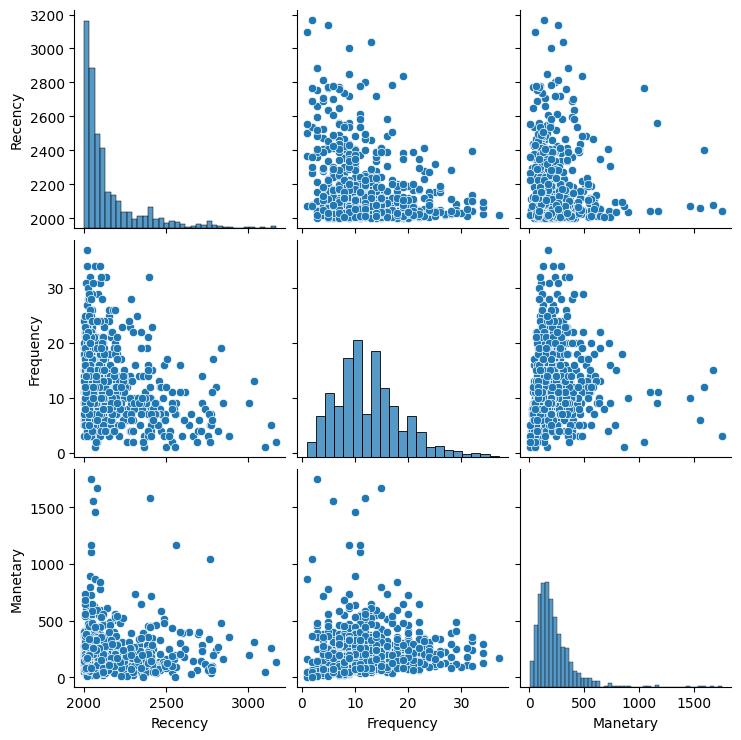

In [10]:
sns.pairplot(df_cluster)

The distributions of data of Manetary and Recency are right skwed. I use log function to make to normal + scale the data

In [11]:
df_cluster_scaled=np.log(df_cluster)
df_cluster_scaled

,Recency,Frequency,Manetary
0,7.689829,2.397895,6.226098
1,7.611348,2.708050,4.254563
2,7.723562,2.484907,5.005350
3,7.629004,2.890372,5.644059
4,7.790282,1.791759,4.995134
...,...,...,...
788,7.623153,3.332205,4.440404
789,7.603898,2.079442,6.524727
790,7.606387,2.484907,6.328003
791,7.628518,3.433987,5.556418


Check for nan values (log of zero gives nane)

In [12]:
df_cluster_scaled.isna().sum()

Recency      0
Frequency    0
Manetary     0
dtype: int64

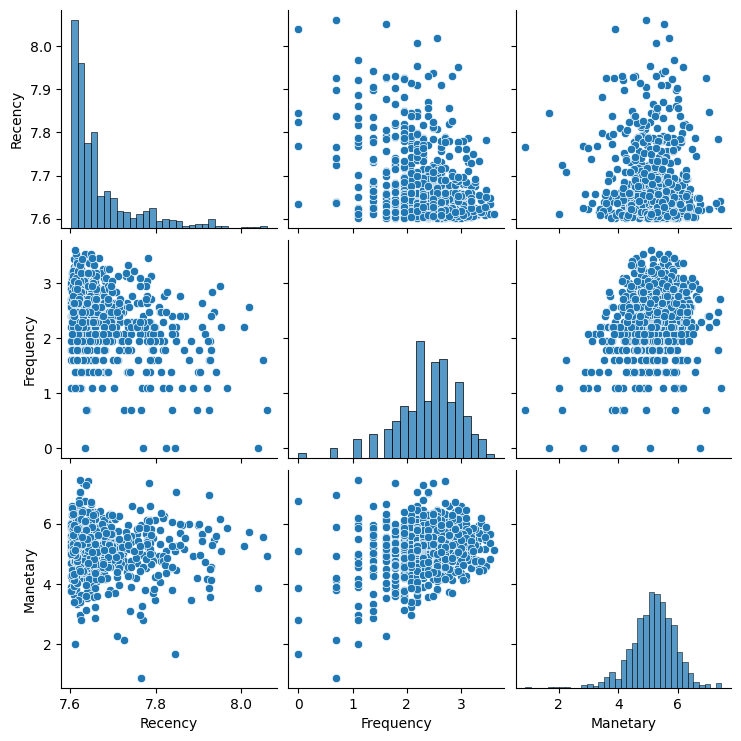

In [13]:
sns.pairplot(df_cluster_scaled)

Plot boxplot to see whether we have outliers or not

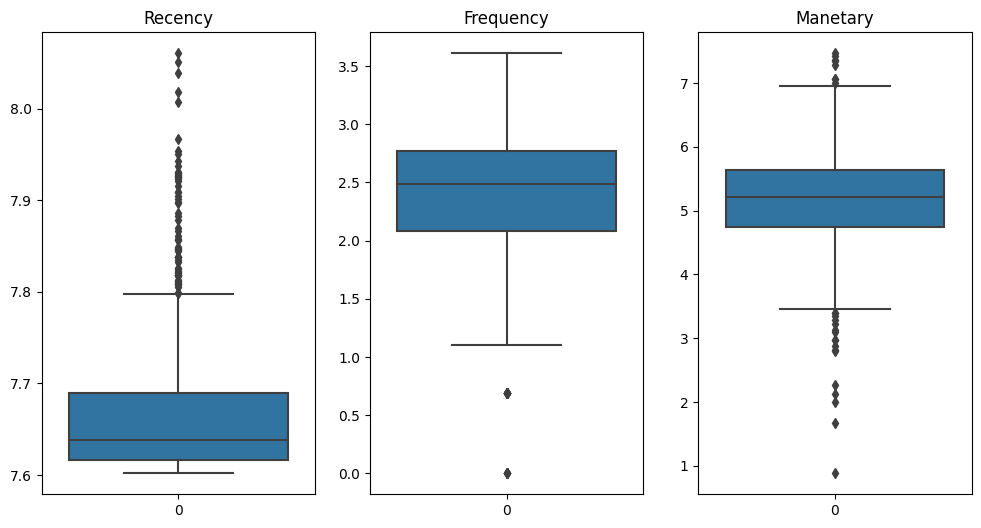

In [14]:
plt.figure(figsize=(12,6))
k=0
for col in df_cluster_scaled.columns:
    plt.subplot2grid((1,3),(0,k))
    sns.boxplot(df_cluster_scaled[col])
    k+=1
    plt.title(col)

    

We see that there are some outliers. I use IQR method to remove the outliers

In [15]:
for col in df_cluster_scaled.columns:
    q1 = df_cluster_scaled[col].quantile(0.25)
    q3 = df_cluster_scaled[col].quantile(0.75)
    IQR = q3-q1 
    L  = q1-1.5*IQR
    H = q3+1.5*IQR
    df_cluster_scaled = df_cluster_scaled.loc[(df_cluster_scaled[col] > L) & (df_cluster_scaled[col] < H)]




check whether outliers have been removed

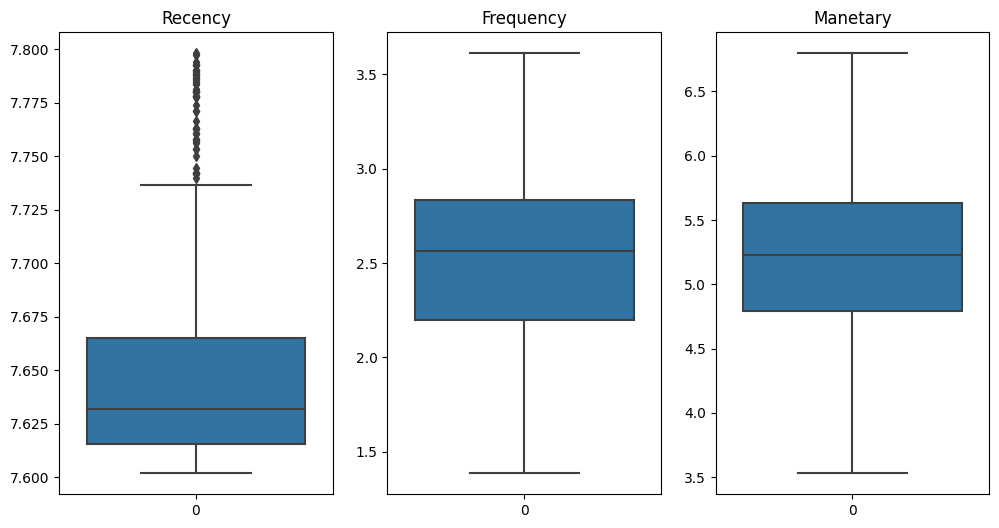

In [16]:
plt.figure(figsize=(12,6))
k=0
for col in df_cluster_scaled.columns:
    plt.subplot2grid((1,3),(0,k))
    sns.boxplot(df_cluster_scaled[col])
    k+=1
    plt.title(col)

Look at distribution of data

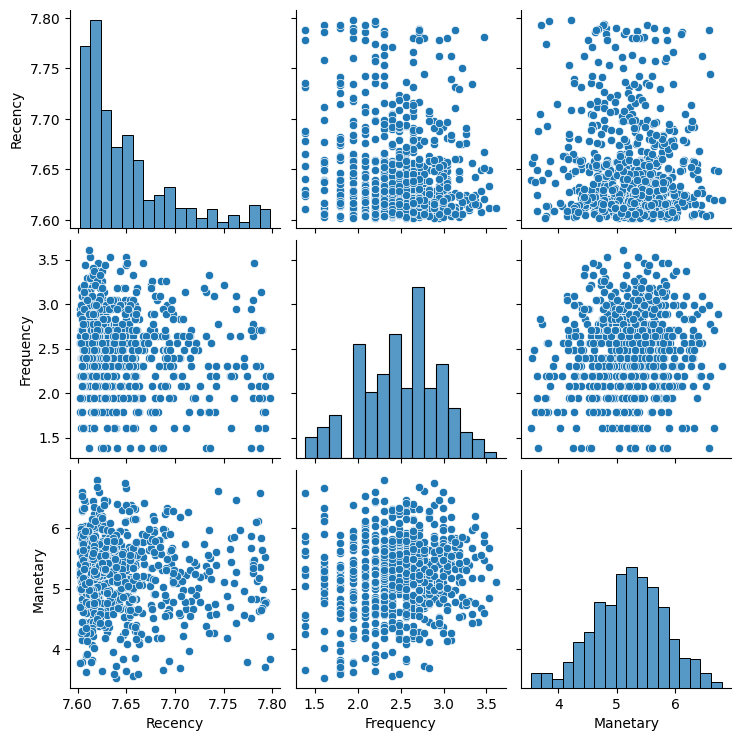

In [17]:
sns.pairplot(df_cluster_scaled)

Now time to start clustering. First find the right number of k. I use Elbow method

2
3
4
5
6
7
8


/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

9
10
11
12
13
14


/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

15
16
17
18
19


/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'ssd')

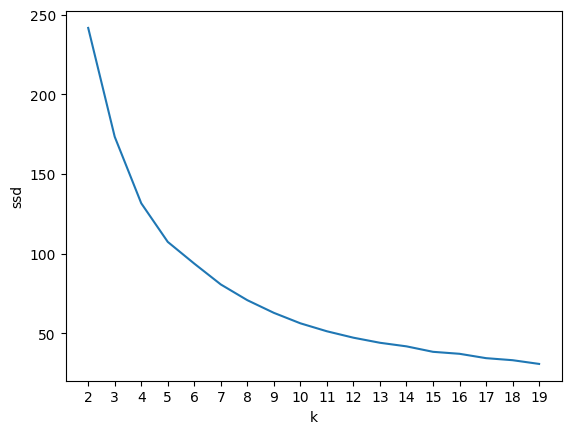

In [18]:
ssd = [] # sum of squared distances
for k in range(2,20):
    print(k)
    model = KMeans(n_clusters=k, max_iter=50)
    model.fit(df_cluster_scaled)

    ssd.append(model.inertia_)

x=np.arange(2,20)
plt.plot(x,ssd)
plt.xticks(np.arange(2,20))
plt.xlabel('k')
plt.ylabel('ssd')

The curve is bent at ~ 4-5. I choose 4.

In [19]:
model = KMeans(n_clusters = 4).fit(df_cluster_scaled)
prediction =model.fit_predict(df_cluster_scaled)
df_cluster_scaled_pred=np.exp(df_cluster_scaled).astype(int)
df_cluster_scaled_pred['predict']=prediction
df_cluster_scaled_pred

/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Manetary,predict
0,2185,11,505,0
1,2021,15,70,2
2,2261,12,149,1
3,2057,17,282,0
4,2417,6,147,3
...,...,...,...,...
788,2045,27,84,1
789,2005,7,681,0
790,2011,12,560,0
791,2055,31,258,1


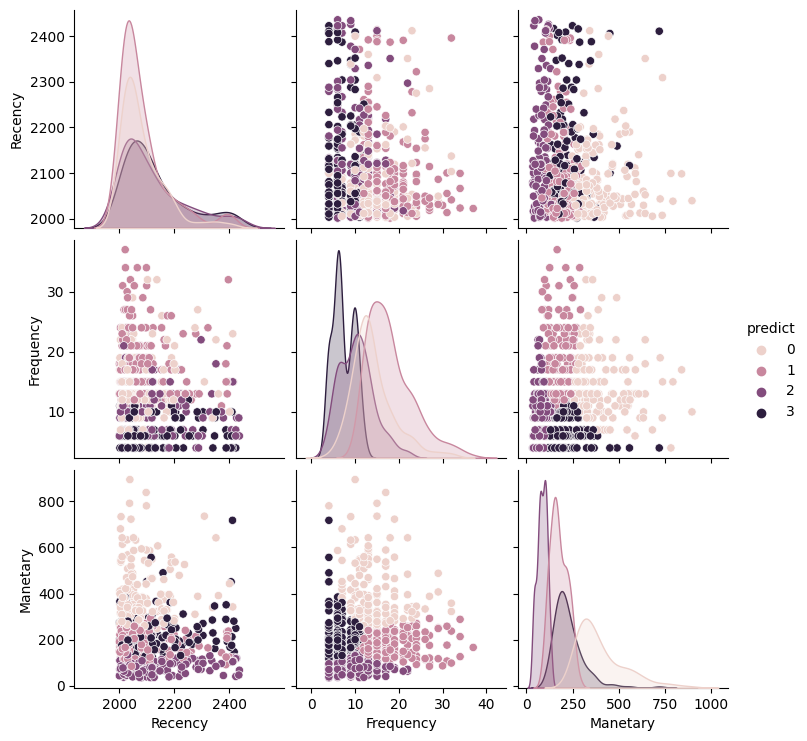

In [20]:
sns.pairplot(df_cluster_scaled_pred, hue='predict')

Let's look at avarege of Recency, Frequency and Manetary in these four groups.

In [21]:
df_cluster_scaled_pred.groupby('predict').mean()

,Recency,Frequency,Manetary
predict,,,
0,2083.616766,14.005988,400.023952
1,2084.682819,18.017621,174.171806
2,2121.184211,10.315789,84.125000
3,2130.448980,7.272109,226.353741


Look at boxplots the differences of these groups are more clear.

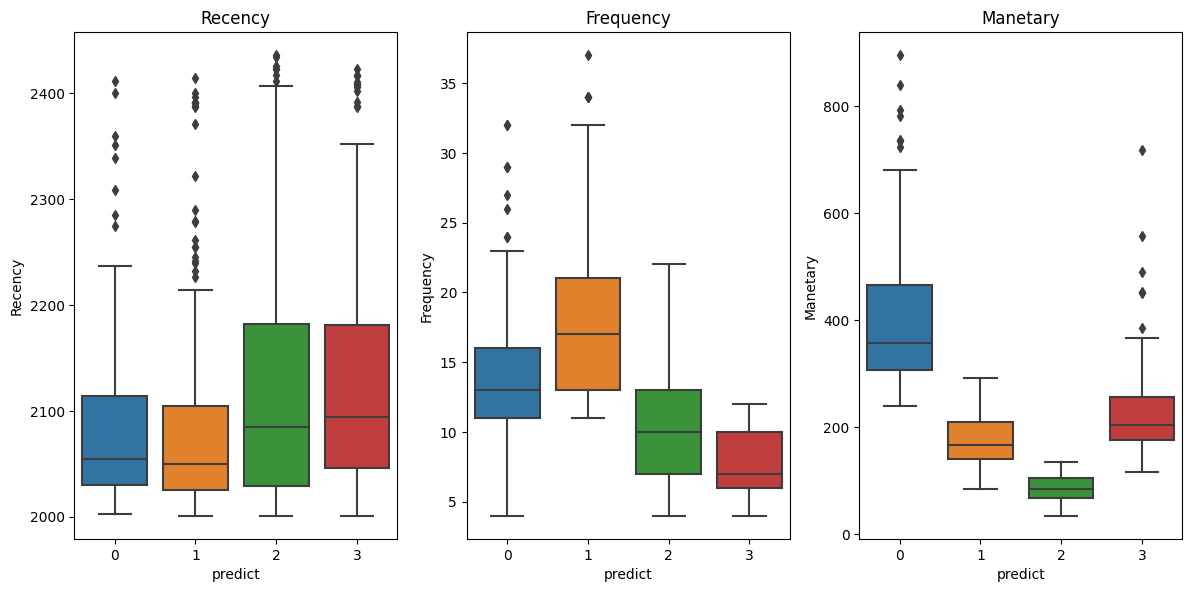

In [22]:
plt.figure(figsize=(12,6))
k=0

for col in df_cluster_scaled[['Recency','Frequency','Manetary']]:

    plt.subplot2grid((1,3),(0,k))
    sns.boxplot(x='predict', y=col, data=df_cluster_scaled_pred)
    k+=1
    plt.title(col)
    plt.tight_layout(pad=1)
    

Let's check Silhouette method for determining k value. As results show K=4 is a good choice.

In [23]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_cluster_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

For n_clusters=2, the silhouette score is 0.35206408304275993
For n_clusters=3, the silhouette score is 0.3324767851114828
For n_clusters=4, the silhouette score is 0.3429222531113685
For n_clusters=5, the silhouette score is 0.32658004723616846
For n_clusters=6, the silhouette score is 0.3231684995617576
For n_clusters=7, the silhouette score is 0.3288236154701027
For n_clusters=8, the silhouette score is 0.3268700683447146


/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pygmt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
